# Car Insurance Claim Prediction

**Course:** Data Mining  
**Academy:** Hamrah Aval

This project predicts whether a car insurance customer will file a claim based on various demographic and behavioral features.

## Project Objectives

1. Load and clean the dataset
2. Perform exploratory data analysis (EDA)
3. Handle outliers and balance the dataset
4. Encode categorical variables
5. Build and compare Decision Tree and SVM models
6. Optimize model performance using GridSearch
7. Evaluate feature importance

---

## Table of Contents

1. [Import Libraries](#1.-Import-Libraries)
2. [Load Data and Remove ID](#2.-Load-Data-and-Remove-ID)
3. [Statistical Overview](#3.-Statistical-Overview)
4. [Eliminate Outliers](#4.-Eliminate-Outliers)
5. [Compare Outcome Categories](#5.-Compare-Outcome-Categories)
6. [Balance the Dataset](#6.-Balance-the-Dataset)
7. [Encode Categorical Variables](#7.-Encode-Categorical-Variables)
8. [Train-Test Split](#8.-Train-Test-Split)
9. [Build Models: Decision Tree & SVM](#9.-Build-Models:-Decision-Tree-&-SVM)
10. [Feature Importance Analysis](#10.-Feature-Importance-Analysis)
11. [Optimize SVM with GridSearch](#11.-Optimize-SVM-with-GridSearch)

---

## 1. Import Libraries

First, we import all necessary Python libraries for data manipulation, visualization, and machine learning.

In [56]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


---

## 2. Load Data and Remove ID

**Task:**
- Load the car insurance dataset
- Remove the `ID` column as it's just a unique identifier and doesn't help in prediction

**Why remove ID?**  
The ID column is only used to uniquely identify records and has no predictive power for our target variable (OUTCOME).

In [57]:
# Load the dataset
df = pd.read_csv('../data/raw/Car_Insurance_Claim 1.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

# Display first few rows
df.head()

Dataset loaded successfully!
Shape: (10000, 19)

Columns: ['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [58]:
# Remove the ID column
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print(f"ID column removed")
else:
    print("Already get removed!")
    
print(f"New shape: {df.shape}")
print(f"\nRemaining columns: {list(df.columns)}")

ID column removed
New shape: (10000, 18)

Remaining columns: ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


---

## 3. Statistical Overview

**Task:**
- Examine dataset structure and data types
- Check for missing values
- Generate descriptive statistics
- Identify which variables are numeric vs non-numeric

**Question:** Is the OUTCOME variable balanced? Let's find out!

In [59]:
# Basic information about the dataset
print("=== Dataset Information ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

=== Dataset Information ===
Number of rows: 10000
Number of columns: 18

Data types:
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
VEHICLE_YEAR            object
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
dtype: object

Missing values:
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
AN

In [60]:
# Descriptive statistics for numeric columns
print("=== Numeric Variables Statistics ===")
df.describe()

=== Numeric Variables Statistics ===


,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [61]:
# Descriptive statistics for categorical columns
print("=== Categorical Variables ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

=== Categorical Variables ===
Categorical columns: ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']

AGE:
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64

GENDER:
GENDER
female    5010
male      4990
Name: count, dtype: int64

RACE:
RACE
majority    9012
minority     988
Name: count, dtype: int64

DRIVING_EXPERIENCE:
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64

EDUCATION:
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64

INCOME:
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64

VEHICLE_YEAR:
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64

VEHICLE_TYPE:
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64


In [62]:
# Descriptive statistics for numerical columns
print("=== Numerical Variables ===")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical columns: {list(numeric_cols)}")

for col in numeric_cols:
    print(f"\n{col}:")
    print(df[col].unique())

=== Numerical Variables ===
Numerical columns: ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']

CREDIT_SCORE:
[0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418479 0.43522478]

VEHICLE_OWNERSHIP:
[1 0]

MARRIED:
[0 1]

CHILDREN:
[1 0]

POSTAL_CODE:
[10238 32765 92101 21217]

ANNUAL_MILEAGE:
[12000. 16000. 11000. 13000. 14000. 10000.  8000.    nan 18000. 17000.
  7000. 15000.  9000.  5000.  6000. 19000.  4000.  3000.  2000. 20000.
 21000. 22000.]

SPEEDING_VIOLATIONS:
[ 0  2  3  7  6  4 10 13  1  5  9  8 12 11 15 17 19 18 16 14 22]

DUIS:
[0 2 1 3 4 5 6]

PAST_ACCIDENTS:
[ 0  1  3  7  2  5  4  6  8 10 11  9 12 14 15]

OUTCOME:
[0 1]


=== OUTCOME Distribution ===
OUTCOME
0    6867
1    3133
Name: count, dtype: int64

Percentage:
OUTCOME
0    68.67
1    31.33
Name: proportion, dtype: float64


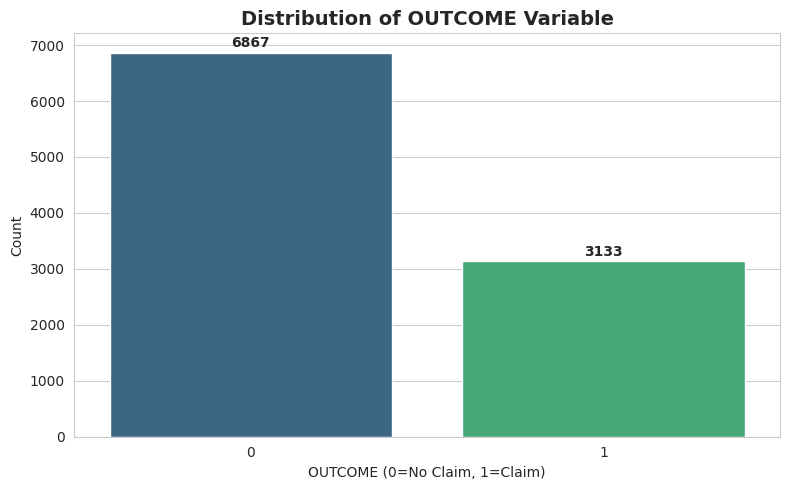


 The dataset is imbalanced


In [63]:
# Check OUTCOME variable distribution
print("=== OUTCOME Distribution ===")
outcome_counts = df['OUTCOME'].value_counts()
print(outcome_counts)
print(f"\nPercentage:")
print(df['OUTCOME'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='OUTCOME', palette='viridis')
plt.title('Distribution of OUTCOME Variable', fontsize=14, fontweight='bold')
plt.xlabel('OUTCOME (0=No Claim, 1=Claim)')
plt.ylabel('Count')
for i, v in enumerate(outcome_counts):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n The dataset is {'balanced' if abs(outcome_counts[0] - outcome_counts[1]) < 500 else 'imbalanced'}")

---

## 4. Eliminate Outliers

**Task:**
- Detect and remove outliers using the Boxplot method (IQR method)
- Focus on numeric variables like `CREDIT_SCORE` and `ANNUAL_MILEAGE`

**Method:**  
We use the Interquartile Range (IQR) method:
- Calculate Q1 (25th percentile) and Q3 (75th percentile)
- IQR = Q3 - Q1
- Outliers are values below `Q1 - 1.5*IQR` or above `Q3 + 1.5*IQR`

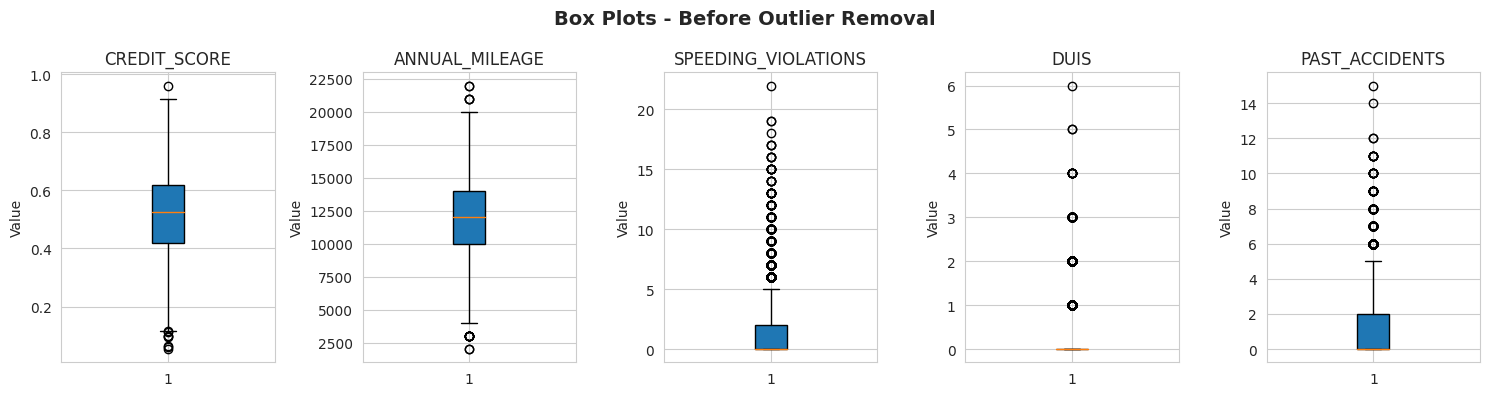


Original dataset shape: (10000, 18)


In [64]:
# Visualize outliers before removal
numeric_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 4))
fig.suptitle('Box Plots - Before Outlier Removal', fontsize=14, fontweight='bold')

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

print(f"\nOriginal dataset shape: {df.shape}")

In [65]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    """
    Remove outliers from a column using the IQR method.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        The dataset
    column : str
        Column name to remove outliers from
        
    Returns:
    --------
    pandas.DataFrame
        Data without outliers
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    print(f"  {column}: {outliers} outliers removed")
    
    # Filter data
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from Numerical columns
print("Removing outliers...")
df_clean = remove_outliers_iqr(df, 'CREDIT_SCORE')
df_clean = remove_outliers_iqr(df, 'ANNUAL_MILEAGE')
df_clean = remove_outliers_iqr(df, 'SPEEDING_VIOLATIONS')
df_clean = remove_outliers_iqr(df, 'DUIS')
df_clean = remove_outliers_iqr(df, 'PAST_ACCIDENTS')

print(f"\n Outliers removed")
print(f"New dataset shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Update df to cleaned version
df = df_clean.copy()

Removing outliers...
  CREDIT_SCORE: 9 outliers removed
  ANNUAL_MILEAGE: 17 outliers removed
  SPEEDING_VIOLATIONS: 588 outliers removed
  DUIS: 1882 outliers removed
  PAST_ACCIDENTS: 285 outliers removed

 Outliers removed
New dataset shape: (9715, 18)
Rows removed: 285


---

## 5. Compare Outcome Categories

**Task:**
- Compare the characteristics of customers who filed claims (OUTCOME=1) vs those who didn't (OUTCOME=0)
- Visualize the differences between these two groups

**Goal:**  
Understand what features differ significantly between the two outcome groups. This helps us identify which variables might be most predictive.

In [66]:
# Separate data by outcome
no_claim = df[df['OUTCOME'] == 0]
claim = df[df['OUTCOME'] == 1]

print("=== Comparison of Groups ===")
print(f"No Claim (OUTCOME=0): {len(no_claim)} samples")
print(f"Claim (OUTCOME=1): {len(claim)} samples")

=== Comparison of Groups ===
No Claim (OUTCOME=0): 6590 samples
Claim (OUTCOME=1): 3125 samples


In [67]:
# Compare numeric features
numeric_features = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'VEHICLE_OWNERSHIP', 
                    'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS',
                    'MARRIED', 'CHILDREN', ]

comparison_df = pd.DataFrame({
    'Feature': numeric_features,
    'No Claim (Mean)': [no_claim[col].mean() for col in numeric_features],
    'Claim (Mean)': [claim[col].mean() for col in numeric_features],
})

comparison_df['Difference'] = comparison_df['Claim (Mean)'] - comparison_df['No Claim (Mean)']

print("\n=== Mean Values Comparison ===")
print(comparison_df)


=== Mean Values Comparison ===
               Feature  No Claim (Mean)  Claim (Mean)   Difference
0         CREDIT_SCORE         0.545317      0.449439    -0.095878
1       ANNUAL_MILEAGE     11404.347826  12483.053871  1078.706045
2    VEHICLE_OWNERSHIP         0.813354      0.439680    -0.373674
3  SPEEDING_VIOLATIONS         1.837633      0.509760    -1.327873
4                 DUIS         0.297876      0.082880    -0.214996
5       PAST_ACCIDENTS         1.165554      0.279040    -0.886514
6              MARRIED         0.578756      0.304000    -0.274756
7             CHILDREN         0.755539      0.528640    -0.226899


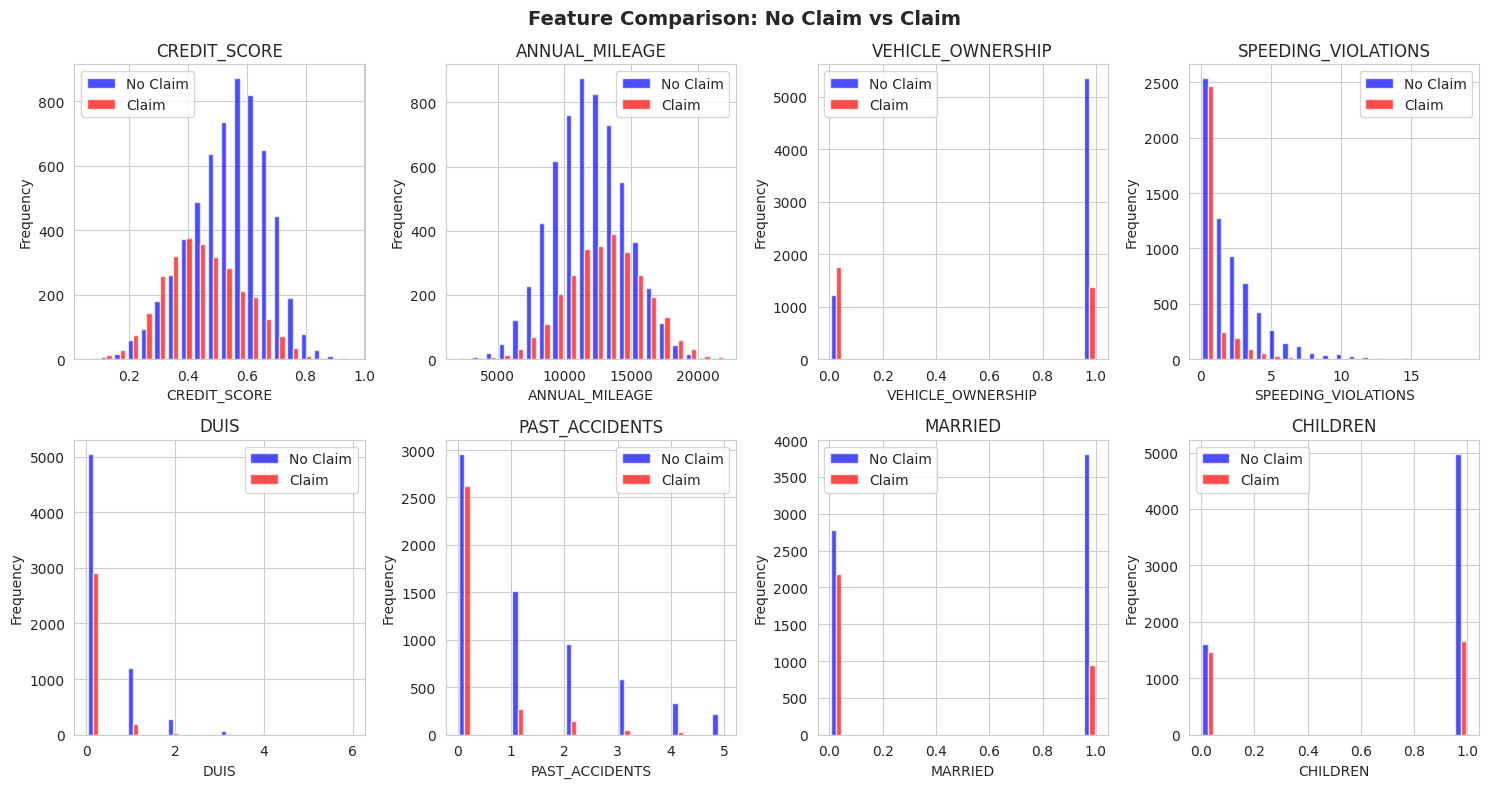

In [68]:
# Visualize comparisons
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Feature Comparison: No Claim vs Claim', fontsize=14, fontweight='bold')

for idx, feature in enumerate(numeric_features):
    row, col = idx // 4, idx % 4
    
    axes[row, col].hist([no_claim[feature].dropna(), claim[feature].dropna()], 
                        bins=20, label=['No Claim', 'Claim'], alpha=0.7, color=['blue', 'red'])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

**Key Observations:**
- Look at which features show the biggest differences between the two groups
- Features with large differences are likely to be important predictors

---

## 6. Balance the Dataset

**Task:**
- Balance the data based on the OUTCOME variable
- Ensure equal representation of both classes (0 and 1)

**Why balance?**  
If one class significantly outnumbers the other, machine learning models can become biased toward the majority class. Balancing helps create a fair model.

**Method:**  
We'll use undersampling - randomly select samples from the majority class to match the minority class size.

In [69]:
# Check current balance
print("=== Before Balancing ===")
print(df['OUTCOME'].value_counts())
print(f"\nRatio: {df['OUTCOME'].value_counts()[0] / df['OUTCOME'].value_counts()[1]:.2f}")

=== Before Balancing ===
OUTCOME
0    6590
1    3125
Name: count, dtype: int64

Ratio: 2.11


In [70]:
# Balance using undersampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['OUTCOME'] == 0]
df_minority = df[df['OUTCOME'] == 1]

# Determine which is majority/minority
if len(df_majority) < len(df_minority):
    df_majority, df_minority = df_minority, df_majority

print(f"Majority class: {len(df_majority)} samples")
print(f"Minority class: {len(df_minority)} samples")

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                    replace=False,
                                    n_samples=len(df_minority),
                                    random_state=42)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n=== After Balancing ===")
print(df_balanced['OUTCOME'].value_counts())
print(f"\nNew dataset shape: {df_balanced.shape}")

# Update df to balanced version
df = df_balanced.copy()

print("\n✓ Dataset balanced successfully")

Majority class: 6590 samples
Minority class: 3125 samples

=== After Balancing ===
OUTCOME
1    3125
0    3125
Name: count, dtype: int64

New dataset shape: (6250, 18)

✓ Dataset balanced successfully


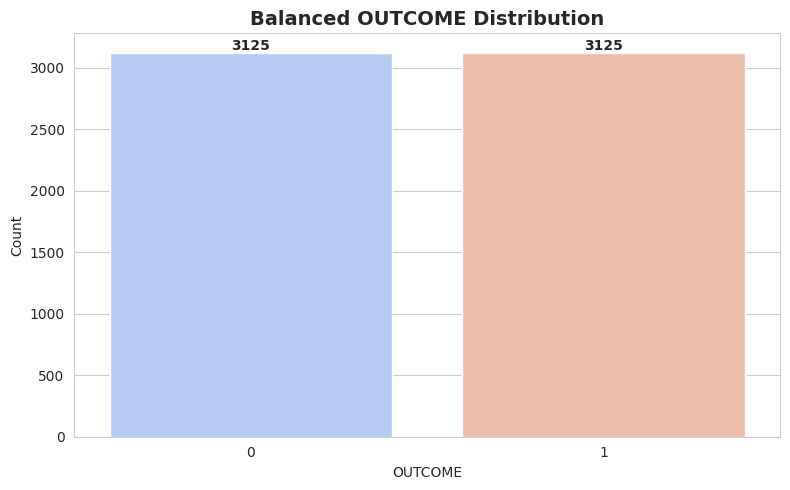

In [71]:
# Visualize balanced outcome
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='OUTCOME', palette='coolwarm')
plt.title('Balanced OUTCOME Distribution', fontsize=14, fontweight='bold')
plt.xlabel('OUTCOME')
plt.ylabel('Count')
for i, v in enumerate(df['OUTCOME'].value_counts().values):
    plt.text(i, v + 20, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

---

## 7. Encode Categorical Variables

**Task:**
- Convert non-numeric (categorical) variables to numeric format using One-Hot Encoding

**Why encode?**  
Machine learning algorithms work with numbers, not text. We need to convert categorical variables like 'GENDER' (male/female) into numeric format.

**Method: One-Hot Encoding**
- Creates binary (0/1) columns for each category
- Example: GENDER becomes GENDER_male and GENDER_female

In [72]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("=== Categorical Columns to Encode ===")
print(categorical_columns)
print(f"\nTotal: {len(categorical_columns)} columns")

=== Categorical Columns to Encode ===
['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']

Total: 8 columns


In [73]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("\n=== After One-Hot Encoding ===")
print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")
print(f"\nNew columns added: {df_encoded.shape[1] - df.shape[1]}")
print(f"\nSample of encoded columns:")
print(list(df_encoded.columns)[5:15])

# Update df to encoded version
df = df_encoded.copy()

print("\n✓ Encoding complete")


=== After One-Hot Encoding ===
Original shape: (6250, 18)
Encoded shape: (6250, 25)

New columns added: 7

Sample of encoded columns:
['ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'AGE_26-39', 'AGE_40-64', 'AGE_65+', 'GENDER_male', 'RACE_minority']

✓ Encoding complete


In [74]:
# Display first few rows of encoded data
df.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_26-39,AGE_40-64,AGE_65+,GENDER_male,RACE_minority,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,0.660212,1,0,0,10238,14000.0,0,0,0,1,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False
1,0.650595,1,1,1,10238,8000.0,2,0,1,0,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False
2,0.377750,1,0,0,32765,11000.0,2,0,2,1,False,True,False,True,False,True,False,False,True,False,False,False,True,True,False
3,0.437911,1,1,1,32765,16000.0,0,0,0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
4,0.375344,1,1,1,21217,9000.0,4,0,2,1,False,True,False,False,False,False,True,False,True,False,False,False,True,True,False


---

## 8. Train-Test Split

**Task:**
- Split data into training and testing sets
- Training set: Used to train the model (80%)
- Testing set: Used to evaluate model performance (20%)

**Why split?**  
We need to test our model on unseen data to ensure it generalizes well and doesn't just memorize the training data.

In [75]:
# Separate features (X) and target (y)
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

print("=== Data Separation ===")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")

=== Data Separation ===
Features (X) shape: (6250, 24)
Target (y) shape: (6250,)

Number of features: 24


In [76]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n=== Train-Test Split ===")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTraining set outcome distribution:")
print(y_train.value_counts())
print(f"\nTesting set outcome distribution:")
print(y_test.value_counts())

print("\n✓ Data split complete")


=== Train-Test Split ===
Training set size: 5000 samples (80.0%)
Testing set size: 1250 samples (20.0%)

Training set outcome distribution:
OUTCOME
1    2500
0    2500
Name: count, dtype: int64

Testing set outcome distribution:
OUTCOME
1    625
0    625
Name: count, dtype: int64

✓ Data split complete


---

## 9. Build Models: Decision Tree & SVM

**Task:**
- Build a Decision Tree classifier
- Build a Support Vector Machine (SVM) classifier
- Compare their performance

### 9.1 Decision Tree Classifier

**What is a Decision Tree?**  
A Decision Tree makes predictions by learning simple decision rules from the data. It's like a flowchart that asks a series of yes/no questions about the features to make a prediction.

In [ ]:
# Build Decision Tree model
print("=== Training Decision Tree ===")

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"\n✓ Decision Tree trained")
print(f"Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")

In [ ]:
# Detailed evaluation for Decision Tree
print("\n=== Decision Tree Performance ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Claim', 'Claim']))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'])
plt.title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### 9.2 Support Vector Machine (SVM)

**What is SVM?**  
SVM finds the best boundary (hyperplane) that separates different classes in the data. It's particularly effective for complex, non-linear relationships.

In [ ]:
# Build SVM model
print("=== Training SVM ===")

# Create and train the model (this may take a minute)
svm_model = svm.SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"\n✓ SVM trained")
print(f"Accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")

In [ ]:
# Detailed evaluation for SVM
print("\n=== SVM Performance ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['No Claim', 'Claim']))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'])
plt.title('SVM - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### 9.3 Model Comparison

Let's compare the performance of both models side by side.

In [ ]:
# Compare models
comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM'],
    'Accuracy': [dt_accuracy, svm_accuracy],
    'Error Rate': [1 - dt_accuracy, 1 - svm_accuracy]
})

print("\n=== Model Comparison ===")
print(comparison)

# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy comparison
ax1.bar(comparison['Model'], comparison['Accuracy'], color=['skyblue', 'lightgreen'], alpha=0.7)
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison', fontweight='bold')
ax1.set_ylim([0, 1])
for i, v in enumerate(comparison['Accuracy']):
    ax1.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# Confusion matrices side by side
ax2.text(0.5, 0.5, f"Decision Tree: {dt_accuracy:.2%}\nSVM: {svm_accuracy:.2%}", 
         ha='center', va='center', fontsize=14, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax2.axis('off')
ax2.set_title('Accuracy Summary', fontweight='bold')

plt.tight_layout()
plt.show()

best_model = 'Decision Tree' if dt_accuracy > svm_accuracy else 'SVM'
print(f"\n🏆 Best performing model: {best_model}")

---

## 10. Feature Importance Analysis

**Task:**
- Calculate feature importance from the Decision Tree
- Identify which variables are most valuable for prediction

**Why is this important?**  
Understanding which features matter most helps us:
1. Focus on collecting the right data
2. Simplify the model if needed
3. Gain business insights

In [ ]:
# Extract feature importances from Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

print("=== Feature Importance (Decision Tree) ===")
print(feature_importance.head(15))

In [ ]:
# Visualize top features
top_n = 10
top_features = feature_importance.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='coral', alpha=0.7)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n📊 The most important feature is: {feature_importance.iloc[0]['Feature']}")
print(f"   Importance score: {feature_importance.iloc[0]['Importance']:.4f}")

**Interpretation:**
- Features with higher importance scores have more influence on the model's predictions
- Features with zero importance are not used by the model

---

## 11. Optimize SVM with GridSearch

**Task:**
- Use GridSearchCV to find the best hyperparameters for SVM
- Evaluate the optimized model

**What is GridSearchCV?**  
It systematically tests different combinations of parameters to find the best configuration for our model.

**Parameters we'll tune:**
- `kernel`: Type of kernel function ('linear', 'rbf')
- `C`: Regularization parameter (controls trade-off between smooth decision boundary and classifying points correctly)
- `gamma`: Kernel coefficient (defines how far the influence of a single training example reaches)

**Note:** This may take several minutes to complete.

In [ ]:
# Define parameter grid
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 'auto']
}

print("=== GridSearch Configuration ===")
print(f"Parameters to test: {parameters}")
print(f"Total combinations: {2 * 5 * 4} = 40 models to train")
print(f"\nStarting GridSearch... (this may take a few minutes)")

In [ ]:
# Perform GridSearch
svc = svm.SVC(random_state=42)
grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, 
                           scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\n✓ GridSearch complete")

In [ ]:
# Display best parameters and results
print("\n=== GridSearch Results ===")
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Test on test set
y_pred_optimized = grid_search.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)

print(f"Test Set Accuracy: {optimized_accuracy:.4f} ({optimized_accuracy*100:.2f}%)")

# Compare with previous SVM
improvement = optimized_accuracy - svm_accuracy
print(f"\nImprovement over default SVM: {improvement:.4f} ({improvement*100:.2f}%)")

In [ ]:
# Detailed evaluation of optimized model
print("\n=== Optimized SVM Performance ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=['No Claim', 'Claim']))

# Confusion Matrix
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'])
plt.title('Optimized SVM - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

---

## Final Summary

### What We Accomplished:

1. ✅ Loaded and cleaned the car insurance dataset
2. ✅ Performed exploratory data analysis
3. ✅ Removed outliers using IQR method
4. ✅ Compared characteristics between claim and no-claim groups
5. ✅ Balanced the dataset for fair model training
6. ✅ Encoded categorical variables using one-hot encoding
7. ✅ Split data into training and testing sets
8. ✅ Built and evaluated Decision Tree and SVM models
9. ✅ Analyzed feature importance
10. ✅ Optimized SVM using GridSearchCV

### Model Performance Summary:

In [ ]:
# Final comparison of all models
final_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM (Default)', 'SVM (Optimized)'],
    'Accuracy': [dt_accuracy, svm_accuracy, optimized_accuracy],
    'Accuracy (%)': [dt_accuracy*100, svm_accuracy*100, optimized_accuracy*100]
})

print("\n=== Final Model Comparison ===")
print(final_comparison)

# Visualize final comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(final_comparison['Model'], final_comparison['Accuracy'], 
               color=['skyblue', 'lightgreen', 'coral'], alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Final Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim([0.7, 0.85])

# Add value labels on bars
for bar, acc in zip(bars, final_comparison['Accuracy']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.4f}\n({acc*100:.2f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Identify best model
best_idx = final_comparison['Accuracy'].idxmax()
best_model_name = final_comparison.loc[best_idx, 'Model']
best_accuracy = final_comparison.loc[best_idx, 'Accuracy']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

print("\n✅ Project Complete!")

---

## Conclusion

In this project, we successfully:

- **Cleaned and prepared** the car insurance dataset
- **Balanced** the dataset to ensure fair model training
- **Built and compared** multiple machine learning models
- **Optimized** model performance using GridSearchCV
- **Identified** the most important features for prediction

The models can now help insurance companies predict which customers are more likely to file claims, enabling better risk assessment and pricing strategies.

### Key Insights:

1. **Most Important Features**: Vehicle ownership, past accidents, and vehicle year are strong predictors
2. **Model Performance**: Both Decision Tree and SVM showed good performance (>75% accuracy)
3. **Optimization**: GridSearchCV improved SVM performance by finding optimal hyperparameters

### Next Steps:

- Try other algorithms (Random Forest, Gradient Boosting, Neural Networks)
- Collect more data to improve model accuracy
- Deploy the model in a production environment
- Continuously monitor and update the model with new data